#### Sequential API
Sequential API를 이용하는 방법은 모델이 순차적인 구조로 진행할 때 사용하는 간단한 방법입니다. 다만 이 방법은 다중 입력 및 출력이 존재하는 등의 복잡한 모델을 구성할 수 없습니다.

Sequential API를 이용한 방법 중 첫번째는 Sequential 객체 생성 후,add()를 이용하여 사용할 레이어들을 추가하는 방법입니다.

In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models, utils

In [6]:
model = models.Sequential()
model.add(layers.Input(shape=(28, 28)))
model.add(layers.Dense(300, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 28, 300)           8700      
                                                                 
 dense_1 (Dense)             (None, 28, 100)           30100     
                                                                 
 dense_2 (Dense)             (None, 28, 10)            1010      
                                                                 
Total params: 39810 (155.51 KB)
Trainable params: 39810 (155.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


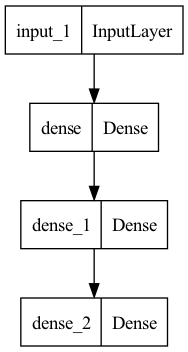

In [7]:
# plot_model() 함수를 통해 딥러닝 모델의 모습을 시각적으로 확인할 수 있습니다.
utils.plot_model(model)

In [8]:
# 다른 방법으로는 Sequential 인자에 한번에 추가하는 방법이 있습니다.
model = models.Sequential([layers.Input(shape=(28, 28), name='Input'),
                           layers.Dense(300, activation='relu', name='Dense1'),
                           layers.Dense(100, activation='relu', name='Dense2'),
                           layers.Dense(10, activation='softmax', name='Output')])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense1 (Dense)              (None, 28, 300)           8700      
                                                                 
 Dense2 (Dense)              (None, 28, 100)           30100     
                                                                 
 Output (Dense)              (None, 28, 10)            1010      
                                                                 
Total params: 39810 (155.51 KB)
Trainable params: 39810 (155.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


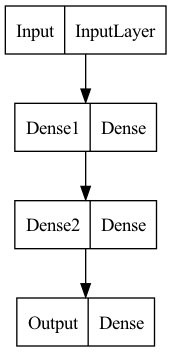

In [9]:
utils.plot_model(model)


#### Functional API

모델 생성에 Functional API를 이용하는 방법은 가장 권장되는 방법입니다. Functional API는 딥러닝 모델을 복잡하고, 유연하게 구성하는 것이 가능하며, 다중 입출력을 다룰 수 있습니다.

In [10]:
inputs = layers.Input(shape=(28, 28, 1))
x = layers.Flatten(input_shape=(28, 28, 1))(inputs)
x = layers.Dense(300, activation='relu')(x)
x = layers.Dense(100, activation='relu')(x)
x = layers.Dense(10, activation='softmax')(x)

model = models.Model(inputs=inputs, outputs=x)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


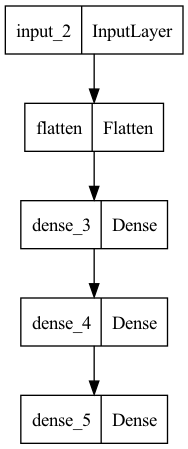

In [11]:
utils.plot_model(model)

Functional API를 이용하면 Input 객체를 여러 레이어에서 사용하는 것이 가능합니다. 아래의 예제에서는 Concatenate()를 이용하여 Dense 레이어 결과와 Input을 결합하였습니다

In [12]:
inputs = keras.Input(shape=(28, 28))
hidden1 = layers.Dense(100, activation='relu')(inputs)
hidden2 = layers.Dense(30, activation='relu')(hidden1)
concat = layers.Concatenate()([inputs, hidden2])
output = layers.Dense(1)(concat)

model = models.Model(inputs=[inputs], outputs=[output])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 28, 28)]             0         []                            
                                                                                                  
 dense_6 (Dense)             (None, 28, 100)              2900      ['input_3[0][0]']             
                                                                                                  
 dense_7 (Dense)             (None, 28, 30)               3030      ['dense_6[0][0]']             
                                                                                                  
 concatenate (Concatenate)   (None, 28, 58)               0         ['input_3[0][0]',             
                                                                     'dense_7[0][0]']       

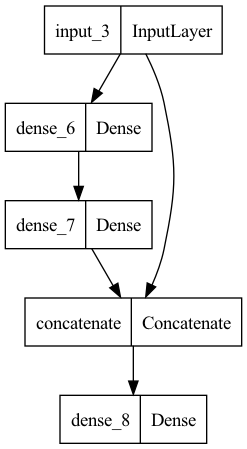

In [13]:
utils.plot_model(model)


Functional API를 이용하면 여러 Input 객체를 사용하는 것도 가능합니다.


In [14]:
input_1 = keras.Input(shape=(10, 10), name='Input_1')
input_2 = keras.Input(shape=(10, 28), name='Input_2')

hidden1 = layers.Dense(100, activation='relu')(input_2)
hidden2 = layers.Dense(10, activation='relu')(hidden1)
concat = layers.Concatenate()([input_1, hidden2])
output = layers.Dense(1, activation='sigmoid', name='output')(concat)

model = models.Model(inputs=[input_1, input_2], outputs=[output])
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 Input_2 (InputLayer)        [(None, 10, 28)]             0         []                            
                                                                                                  
 dense_9 (Dense)             (None, 10, 100)              2900      ['Input_2[0][0]']             
                                                                                                  
 Input_1 (InputLayer)        [(None, 10, 10)]             0         []                            
                                                                                                  
 dense_10 (Dense)            (None, 10, 10)               1010      ['dense_9[0][0]']             
                                                                                            

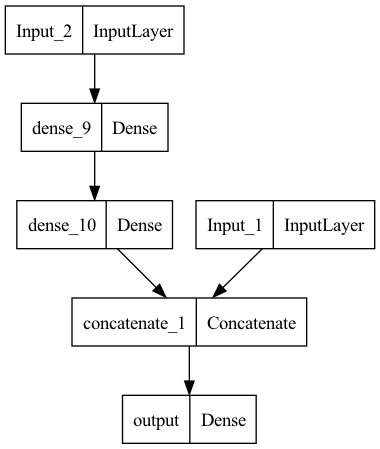

In [15]:
utils.plot_model(model)

Functional API를 이용하면 결과를 여러개로 나눠서 사용하는 것도 가능합니다.

In [16]:
input_ = keras.Input(shape=(10, 10), name='input_')
hidden1 = layers.Dense(100, activation='relu')(input_)
hidden2 = layers.Dense(10, activation='relu')(hidden1)
output = layers.Dense(1, activation='sigmoid', name='main_output')(hidden2)
sub_out = layers.Dense(1, name='sum_output')(hidden2)

model = models.Model(inputs=[input_], outputs=[output, sub_out])
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ (InputLayer)         [(None, 10, 10)]             0         []                            
                                                                                                  
 dense_11 (Dense)            (None, 10, 100)              1100      ['input_[0][0]']              
                                                                                                  
 dense_12 (Dense)            (None, 10, 10)               1010      ['dense_11[0][0]']            
                                                                                                  
 main_output (Dense)         (None, 10, 1)                11        ['dense_12[0][0]']            
                                                                                            

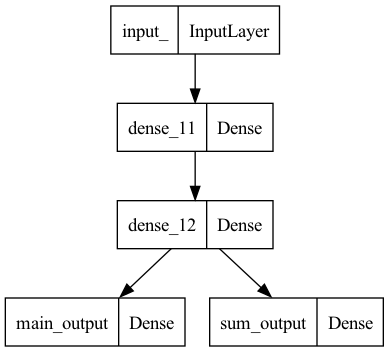

In [17]:
utils.plot_model(model)


Functional API를 이용하여 다중 입력과 다중 출력이 가능한 모델도 만들 수 있습니다.


In [18]:
input_1 = keras.Input(shape=(10, 10), name='input_1')
input_2 = keras.Input(shape=(10, 28), name='input_2')
hidden1 = layers.Dense(100, activation='relu')(input_2)
hidden2 = layers.Dense(10, activation='relu')(hidden1)
concat = layers.Concatenate()([input_1, hidden2])
output = layers.Dense(1, activation='sigmoid', name='main_output')(concat)
sub_out = layers.Dense(1, name='sum_output')(hidden2)

model = models.Model(inputs=[input_1, input_2], outputs=[output, sub_out])
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 10, 28)]             0         []                            
                                                                                                  
 dense_13 (Dense)            (None, 10, 100)              2900      ['input_2[0][0]']             
                                                                                                  
 input_1 (InputLayer)        [(None, 10, 10)]             0         []                            
                                                                                                  
 dense_14 (Dense)            (None, 10, 10)               1010      ['dense_13[0][0]']            
                                                                                            

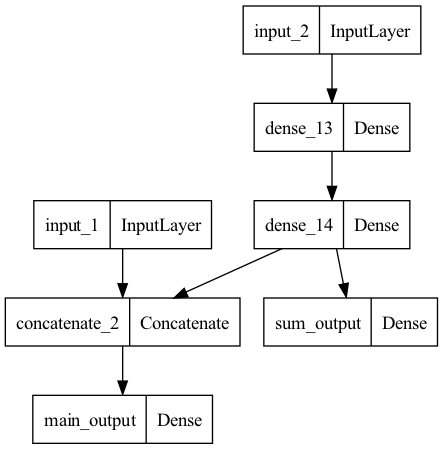

In [19]:
utils.plot_model(model)

#### Subclassing API

서브클래싱(Subclassing) 방법은 커스터마이징에 최적화된 방법으로, Model 클래스를 상속받아서 사용하고 모델에 포함되는 다음과 같은 기능을 사용할 수 있습니다.

fit(): 모델 학습

evaluate(): 모델 평가

predict(): 모델 예측

save(): 모델 저장

load(): 모델 불러오기

call(): 메소드안에서 원하는 계산 가능

Subclassing API를 사용하면 Functional API로도 구현할 수 없는 모델들도 구현이 가능하지만, 객체지향 프로그래밍(Object-oriented Programming)에 익숙해야 합니다.

In [20]:
# Subclassing API의 예시
class MyModel(models.Model):
  def __init__(self, units=30, activation='relu', **kwargs):
    super(MyModel, self).__init__(**kwargs)
    self.dense_layer1 = layers.Dense(300, activation=activation)
    self.dense_layer2 = layers.Dense(100, activation=activation)
    self.dense_layer3 = layers.Dense(units, activation=activation)
    self.output_layer = layers.Dense(10, activation='softmax')

  def call(self, inputs):
    x = self.dense_layer1(inputs)
    x = self.dense_layer2(x)
    x = self.dense_layer3(x)
    x = self.output_layer(x)
    return x

실습해보기

이번에는 위에서 본 것들을 한 번 실습해보는 시간입니다.

어려워보여도 아래 주석을 따라 각각의 방식에 맞춰 모델을 완성해 봅시다.

먼저 Sequential API 방식으로 만들어 봅시다.

Q. 아래 주석을 따라 Seqential API 모델을 완성해 보세요.

In [21]:
model = models.Sequential()

# (100, 100, 3) 형태의 데이터를 받는 Input 레이어를 쌓으세요.
input_layer = layers.Input(shape=(100, 100, 3))

# Flatten 레이어를 쌓으세요.
flatten_layer = layers.Flatten(input_shape=(100, 100, 3))

# Unit의 수는 400, 활성화함수는 ReLU를 사용하는 Dense 레이어를 쌓으세요.
dense_layer1 = layers.Dense(400, activation='relu')

# # Unit의 수는 200, 활성화함수는 ReLU를 사용하는 Dense 레이어를 쌓으세요.
dense_layer2 = layers.Dense(200, activation='relu')

# # Unit의 수는 100, 활성화함수는 Softmax를 사용하는 Dense 레이어를 쌓으세요.
dense_layer3 = layers.Dense(100, activation='softmax')

# 레이어 쌓기
model.add(input_layer)
model.add(flatten_layer)
model.add(dense_layer1)
model.add(dense_layer2)
model.add(dense_layer3)

# 모델 빌드
model.build(input_shape=(None, 100, 100, 3))

# 모델 요약 정보 출력
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 30000)             0         
                                                                 
 dense_15 (Dense)            (None, 400)               12000400  
                                                                 
 dense_16 (Dense)            (None, 200)               80200     
                                                                 
 dense_17 (Dense)            (None, 100)               20100     
                                                                 
Total params: 12100700 (46.16 MB)
Trainable params: 12100700 (46.16 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


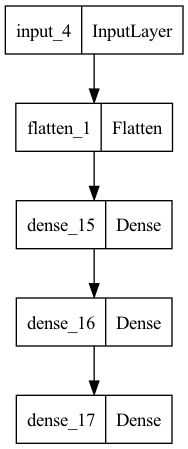

In [22]:
utils.plot_model(model)

**Q. 아래 주석을 따라 Functional API 모델을 완성해 보세요.


In [23]:
# (100, 100, 3) 형태의 데이터를 받는 Input 레이어를 쌓으세요
inputs = layers.Input(shape=(100, 100, 3))

# Flatten 레이어를 쌓으세요.
x = layers.Flatten()(inputs)

# Unit의 수는 400, 활성화함수는 ReLU를 사용하는 Dense 레이어를 쌓으세요.
x = layers.Dense(400, activation='relu')(x)

# Unit의 수는 200, 활성화함수는 ReLU를 사용하는 Dense 레이어를 쌓으세요.
x = layers.Dense(200, activation='relu')(x)

# Unit의 수는 100, 활성화함수는 Softmax를 사용하는 Dense 레이어를 쌓으세요.
x = layers.Dense(100, activation='softmax')(x)

model = models.Model(inputs=inputs, outputs=x)
model.summary()


Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 flatten_2 (Flatten)         (None, 30000)             0         
                                                                 
 dense_18 (Dense)            (None, 400)               12000400  
                                                                 
 dense_19 (Dense)            (None, 200)               80200     
                                                                 
 dense_20 (Dense)            (None, 100)               20100     
                                                                 
Total params: 12100700 (46.16 MB)
Trainable params: 12100700 (46.16 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


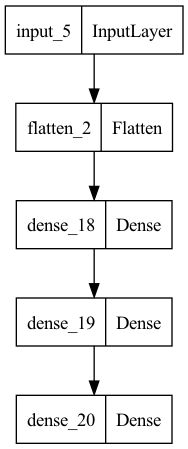

In [24]:
utils.plot_model(model)


눈치 채신 분들도 계실테지만 위 두 실습은 동일한 모델을 만들었습니다.

Subclassing API의 경우도 방금처럼 동일한 모델을 한 번 더 구현해보겠습니다.

코드가 어려운 경우 위의 실습을 참고해 작성해보세요.

Q. 아래 주석을 따라 Subclassing API 모델을 완성해 보세요.

In [26]:
class YourModel(models.Model):
  def __init__(self, **kwargs):
    super(YourModel, self).__init__(**kwargs)
    # Flatten 레이어를 쌓으세요.
    self.flat_layer = tf.keras.layers.Flatten()
    # Unit의 수는 400, 활성화함수는 ReLU를 사용하는 Dense 레이어를 쌓으세요.
    self.dense_layer1 = tf.keras.layers.Dense(400, activation='relu')
    # Unit의 수는 200, 활성화함수는 ReLU를 사용하는 Dense 레이어를 쌓으세요.
    self.dense_layer2 = tf.keras.layers.Dense(200, activation='relu')
    # Unit의 수는 100, 활성화함수는 Softmax를 사용하는 Dense 레이어를 쌓으세요.
    self.output_layer = tf.keras.layers.Dense(100, activation='softmax')

  def call(self, inputs):
    # Flatten 레이어를 통과한 뒤 Dense 레이어를 400 -> 200 -> 100 순으로 통과하도록 쌓으세요.
    x = self.flat_layer(inputs)
    x = self.dense_layer1(x)
    x = self.dense_layer2(x)
    x = self.output_layer(x)
    return x

# (100, 100, 3) 형태를 가진 임의의 텐서를 생성해줍니다.
data = tf.random.normal([100, 100, 3])
# 데이터는 일반적으로 batch 단위로 들어가기 때문에 batch 차원을 추가해주겠습니다.
data = tf.reshape(data, (-1, 100, 100, 3))
model = YourModel()
model(data)

model.summary()


Model: "your_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         multiple                  0         
                                                                 
 dense_24 (Dense)            multiple                  12000400  
                                                                 
 dense_25 (Dense)            multiple                  80200     
                                                                 
 dense_26 (Dense)            multiple                  20100     
                                                                 
Total params: 12100700 (46.16 MB)
Trainable params: 12100700 (46.16 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


이번시간 정리

딥러닝 모델을 구성하는 기본 구조인 레이어에 대한 개념을 이해했습니다.

레이어의 종류와 동작 원리, 그리고 사용 방법을 이해했습니다.

딥러닝 모델을 생성하는 여러 방법들을 살펴보고, 장단점을 비교했습니다.

종합 퀴즈

![](./img03/11.png)

In [34]:
input_1 = keras.Input(shape=(40), name='input_1')
input_2 = keras.Input(shape=(10), name='input_2')
dense = layers.Dense(100, activation='relu')(input_1)
dense1 = layers.Dense(100, activation='relu')(input_2)
concat = layers.Concatenate()([dense, dense1])
dense3 = layers.Dense(40, name='output')(concat)
dense2 = layers.Dense(1, name='sum_output')(concat)
dense4 = layers.Dense(10, activation='sigmoid', name='main_output')(dense3)

model = models.Model(inputs=[input_1, input_2], outputs=[dense2, dense4])
model.summary()

Model: "model_11"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 40)]                 0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 10)]                 0         []                            
                                                                                                  
 dense_39 (Dense)            (None, 100)                  4100      ['input_1[0][0]']             
                                                                                                  
 dense_40 (Dense)            (None, 100)                  1100      ['input_2[0][0]']             
                                                                                           

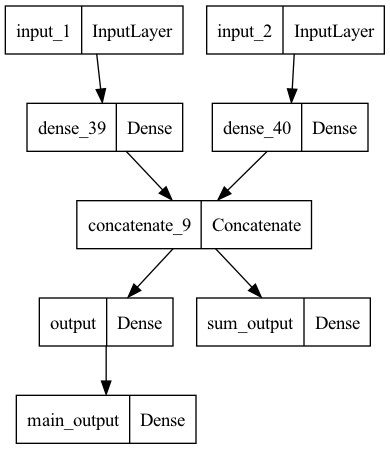

In [35]:
utils.plot_model(model)
